In [66]:
import matplotlib.pyplot as plt
import os
import re
import matplotlib.patches as mpatches

def parse_line(line):
        parts = line.strip().split(',')
        L = int(parts[0].split(':')[1])
        recall = float(parts[1].split(':')[1])
        qps = float(parts[2].split(':')[1])
        return L, recall, qps

def build(methods, K, dataset):
    base_path = '../results/'
    plt.figure(figsize = (12, 8))
    plt.title(f'Сравнение методов поиска для {dataset.upper()} (K={K})')
    plt.xlabel('Recall')
    plt.ylabel('Queries per second (QPS)')
    plt.grid(True, alpha = 0.3)
    colors = ['b', 'g', 'r', 'c', 'm']
    handles = [mpatches.Patch(color = colors[i], label = methods[i]) for i in range(len(methods))]
    plt.legend(handles = handles, title = 'Методы поиска', bbox_to_anchor = (1.05, 1), loc = 'upper left')
    for method, color in zip(methods, colors):
        filename = f"{dataset} + K:{K}, {method}.txt"
        filepath = os.path.join(base_path, filename)
        with open(filepath, 'r') as f:
            lines = f.readlines()
        data = []
        for line in lines:
            try:
                L, recall, qps = parse_line(line)
                data.append((L, recall, qps))
            except:
                continue
        for L, recall, qps in data:
            if qps > 3e4: # zero recall
                continue
            plt.scatter(recall, qps, color = color, marker='o', s = 100, edgecolors = 'k')

    output_path = os.path.join('../comparision', f'comparison_{dataset}_{methods}_K{K}.png')
    plt.savefig(output_path, dpi = 300, bbox_inches = 'tight')
    plt.show()

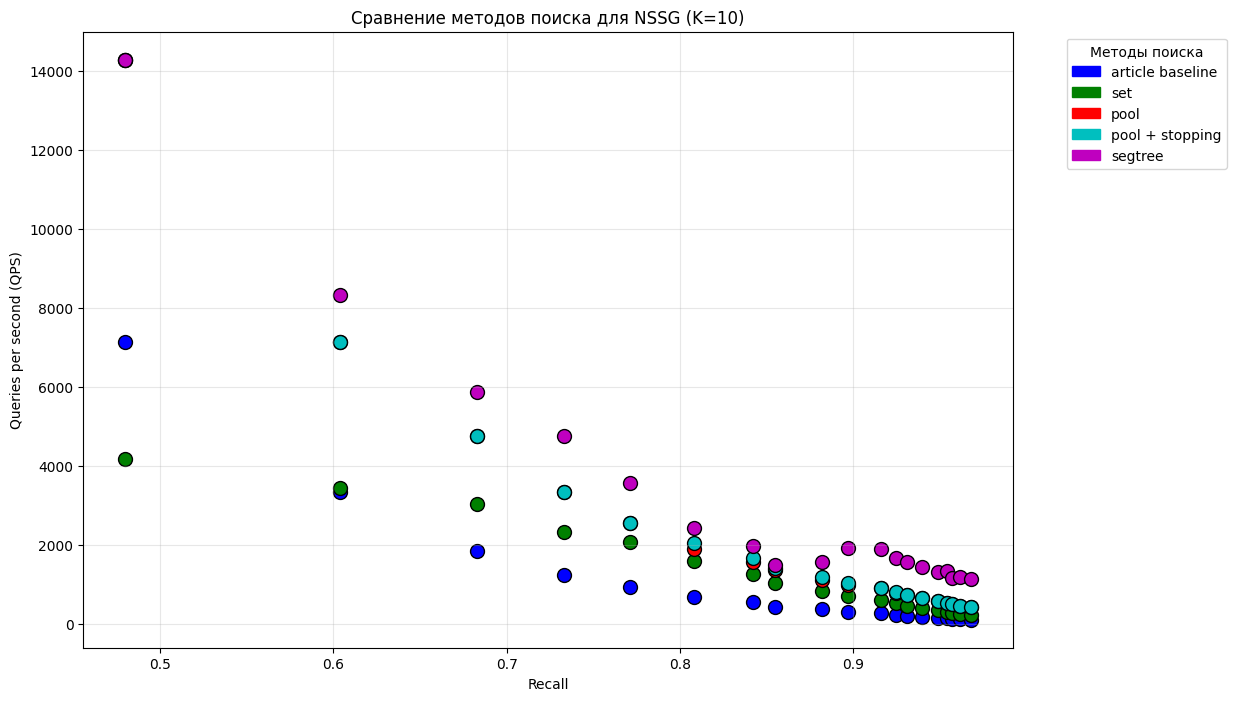

In [67]:
methods = ['article baseline', 'set', 'pool', 'pool + stopping', 'segtree']
K = 10
dataset = 'nssg'
build(methods, K, dataset)

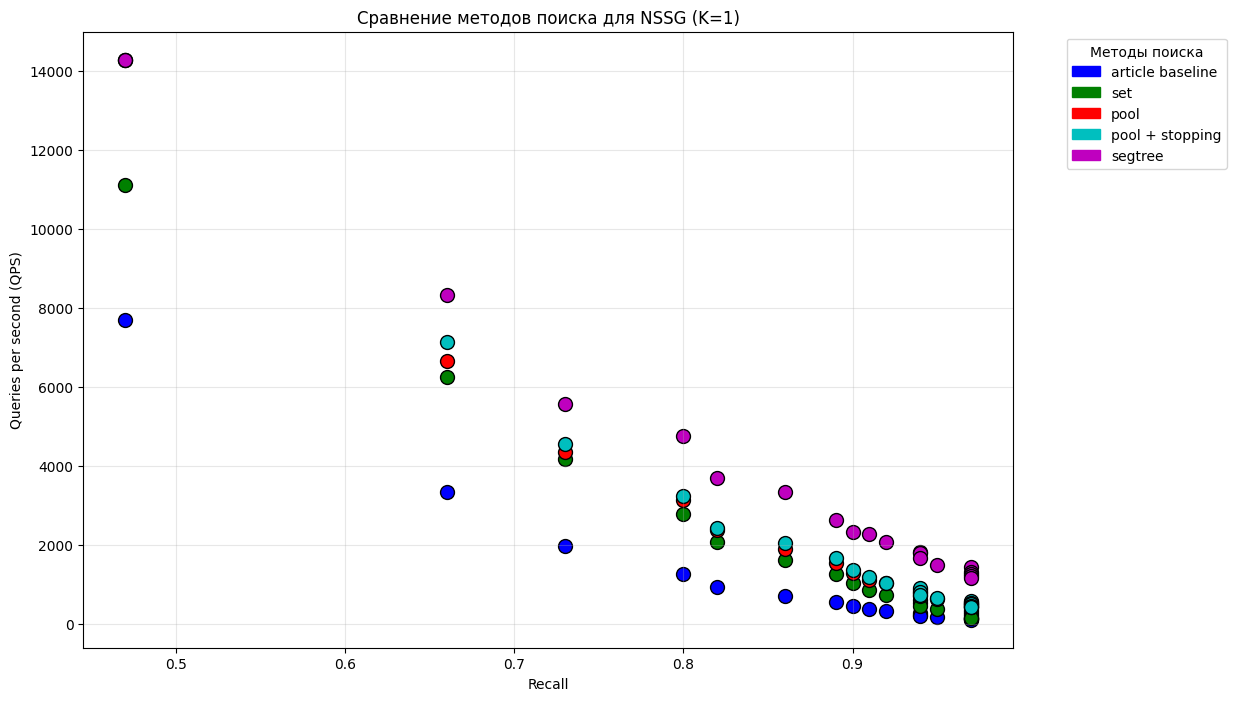

In [68]:
methods = ['article baseline', 'set', 'pool', 'pool + stopping', 'segtree']
K = 1
dataset = 'nssg'
build(methods, K, dataset)

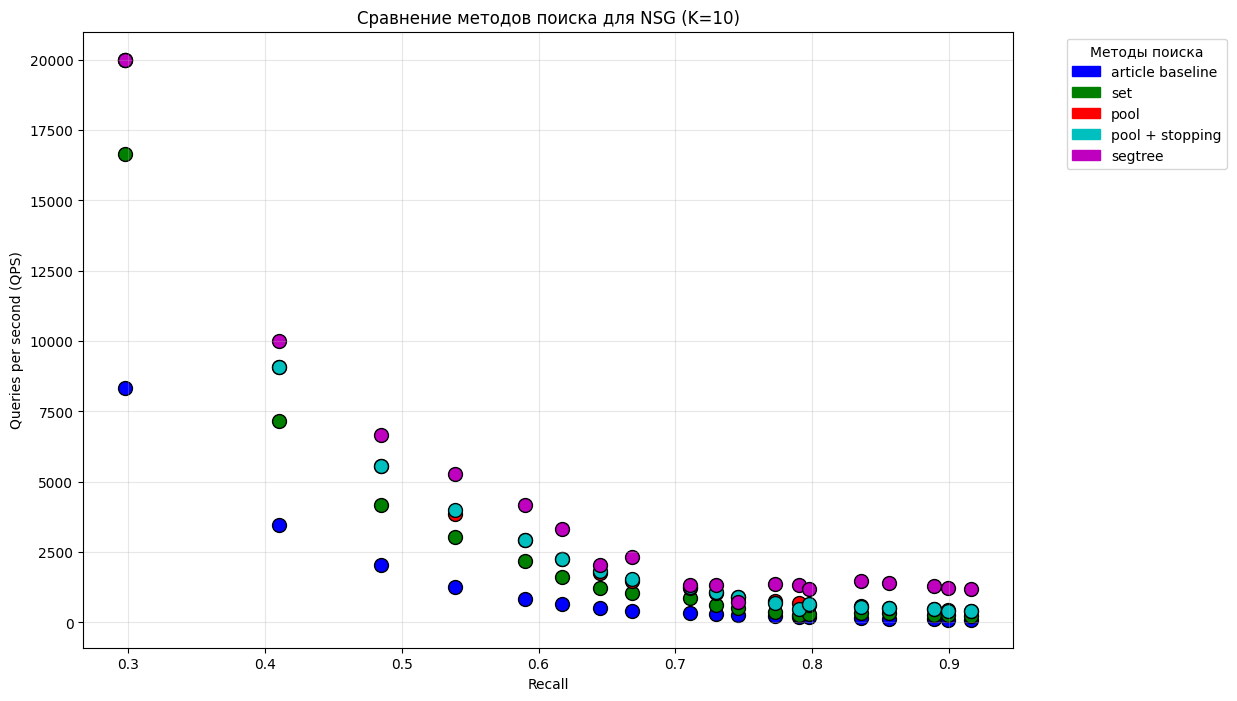

In [69]:
methods = ['article baseline', 'set', 'pool', 'pool + stopping', 'segtree']
K = 10
dataset = 'nsg'
build(methods, K, dataset)

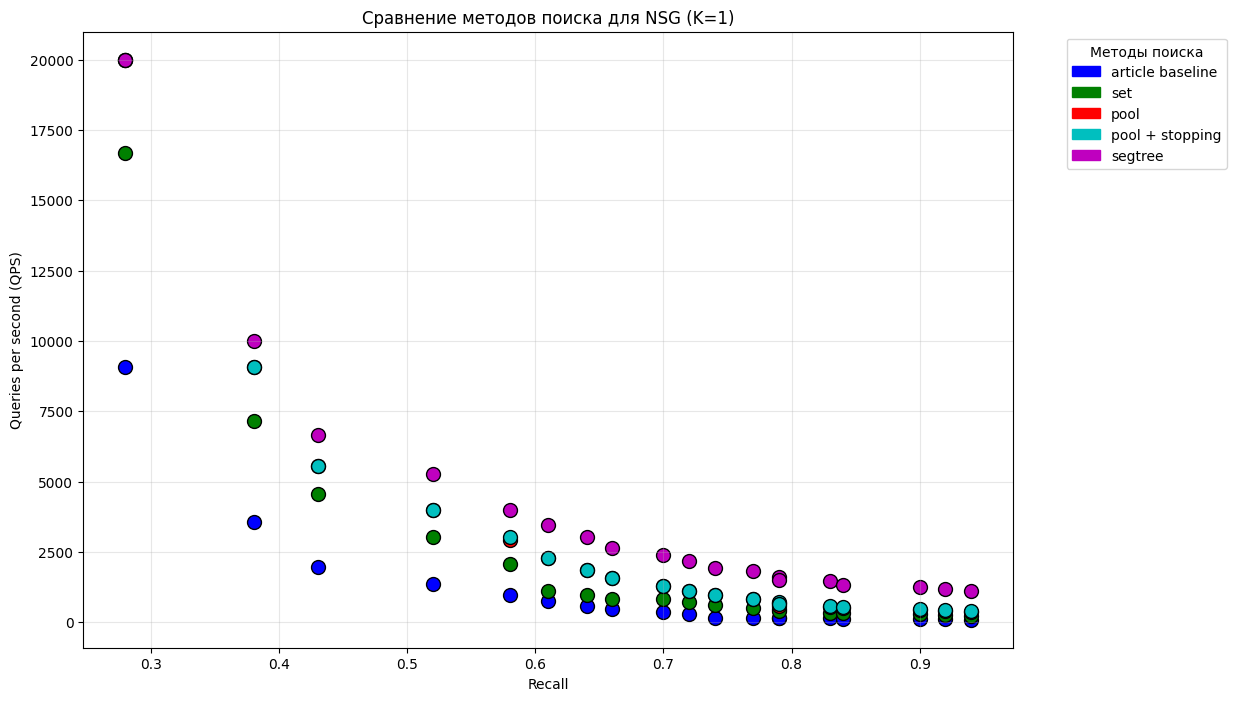

In [70]:
methods = ['article baseline', 'set', 'pool', 'pool + stopping', 'segtree']
K = 1
dataset = 'nsg'
build(methods, K, dataset)

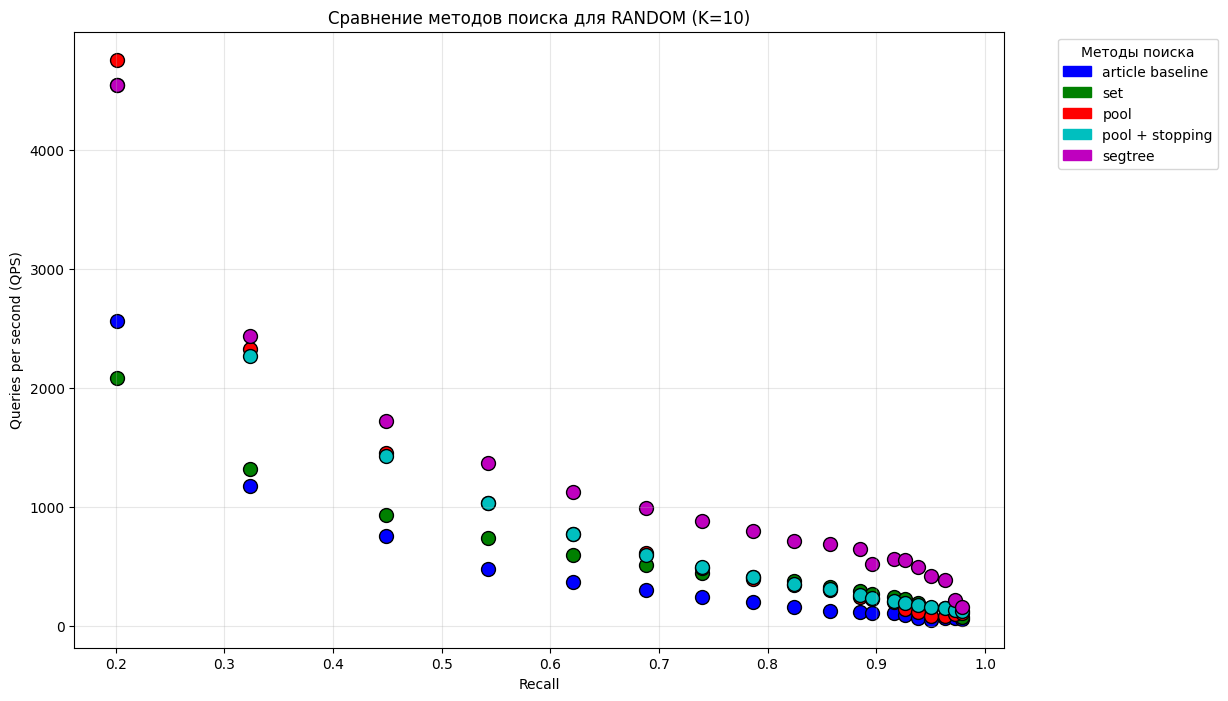

In [71]:
methods = ['article baseline', 'set', 'pool', 'pool + stopping', 'segtree']
K = 10
dataset = 'random'
build(methods, K, dataset)

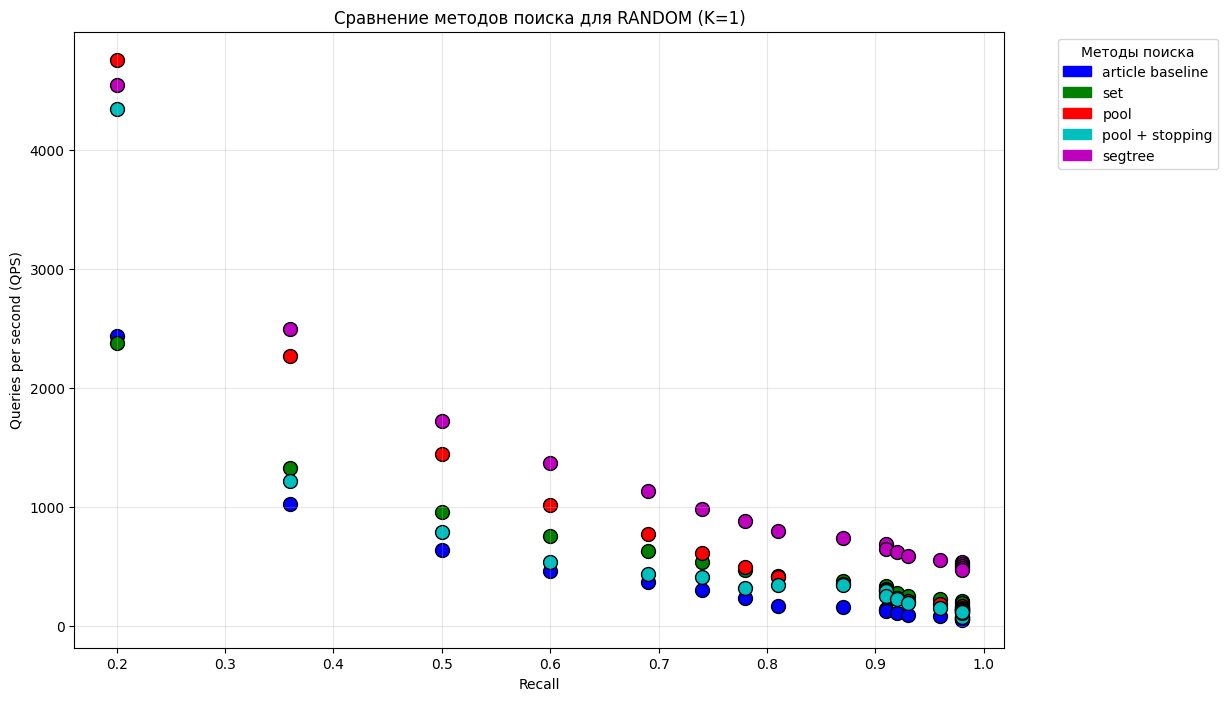

In [72]:
methods = ['article baseline', 'set', 'pool', 'pool + stopping', 'segtree']
K = 1
dataset = 'random'
build(methods, K, dataset)

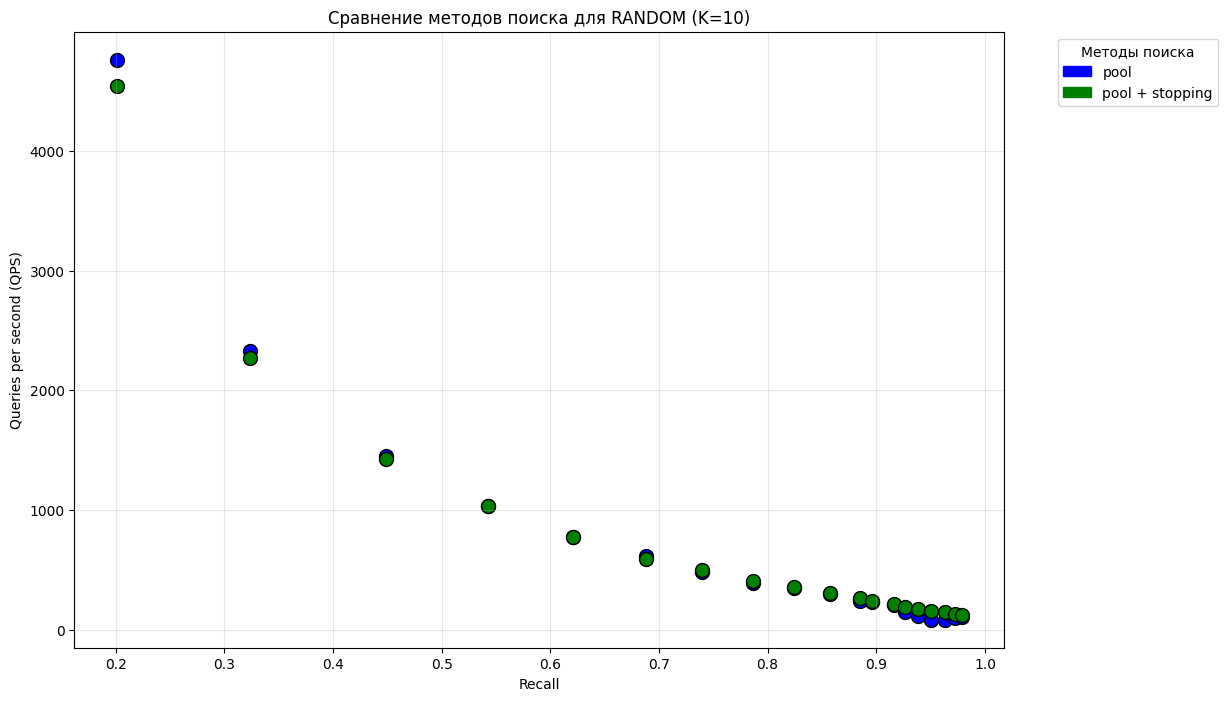

In [73]:
methods = ['pool', 'pool + stopping']
K = 10
dataset = 'random'
build(methods, K, dataset)

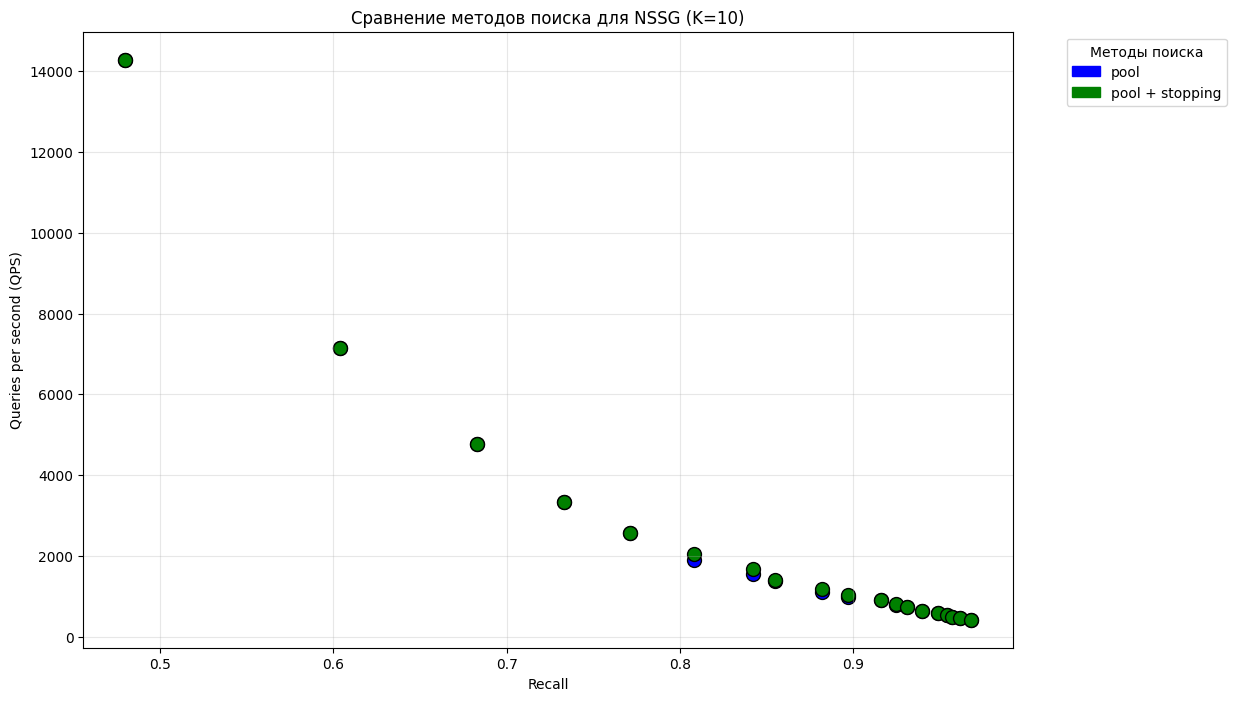

In [74]:
methods = ['pool', 'pool + stopping']
K = 10
dataset = 'nssg'
build(methods, K, dataset)

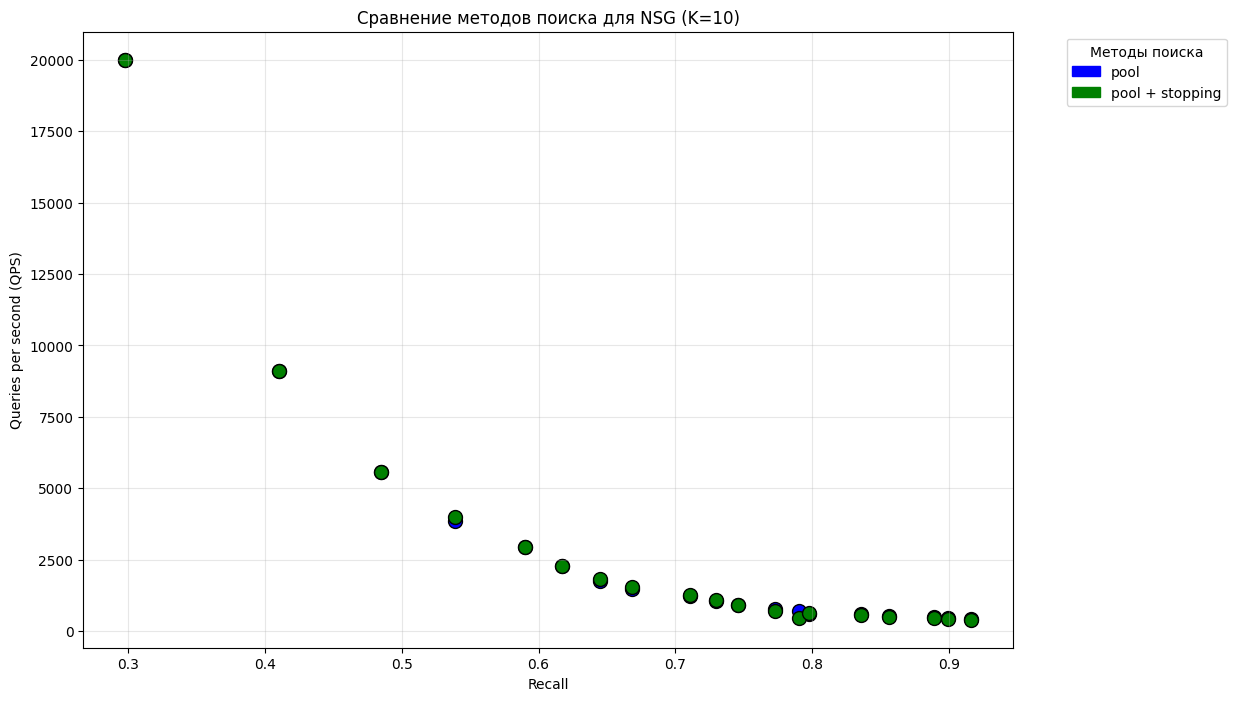

In [75]:
methods = ['pool', 'pool + stopping']
K = 10
dataset = 'nsg'
build(methods, K, dataset)

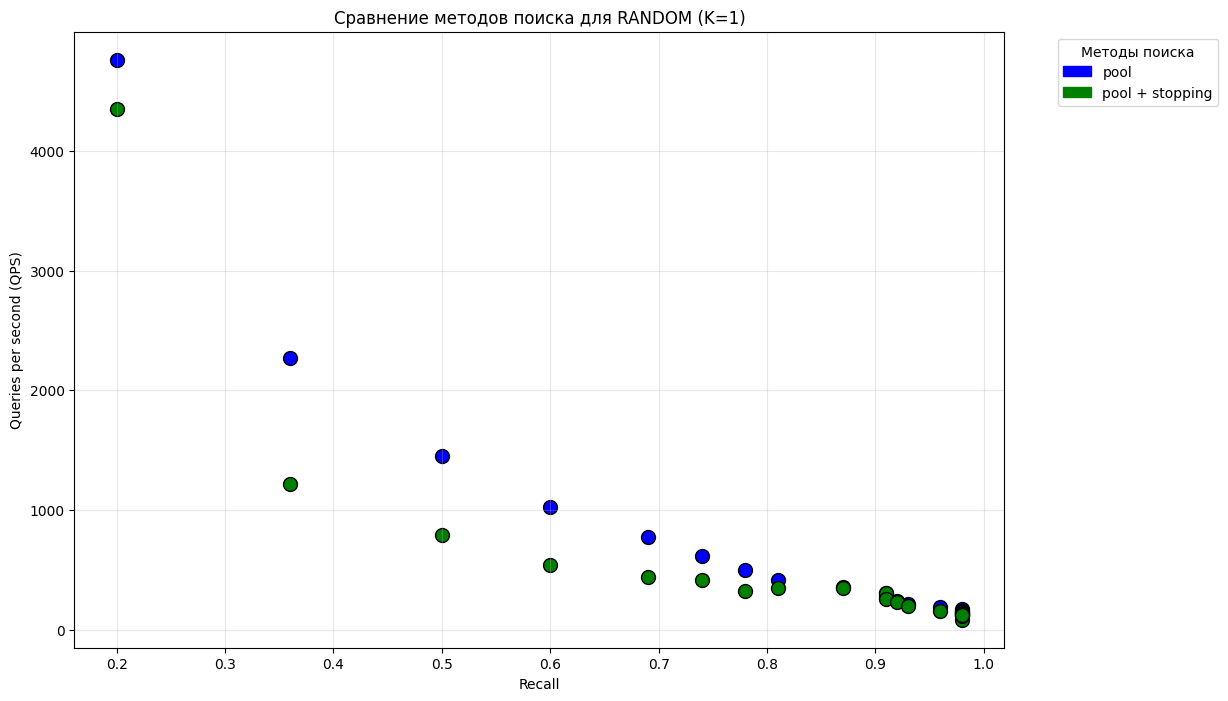

In [76]:
methods = ['pool', 'pool + stopping']
K = 1
dataset = 'random'
build(methods, K, dataset)

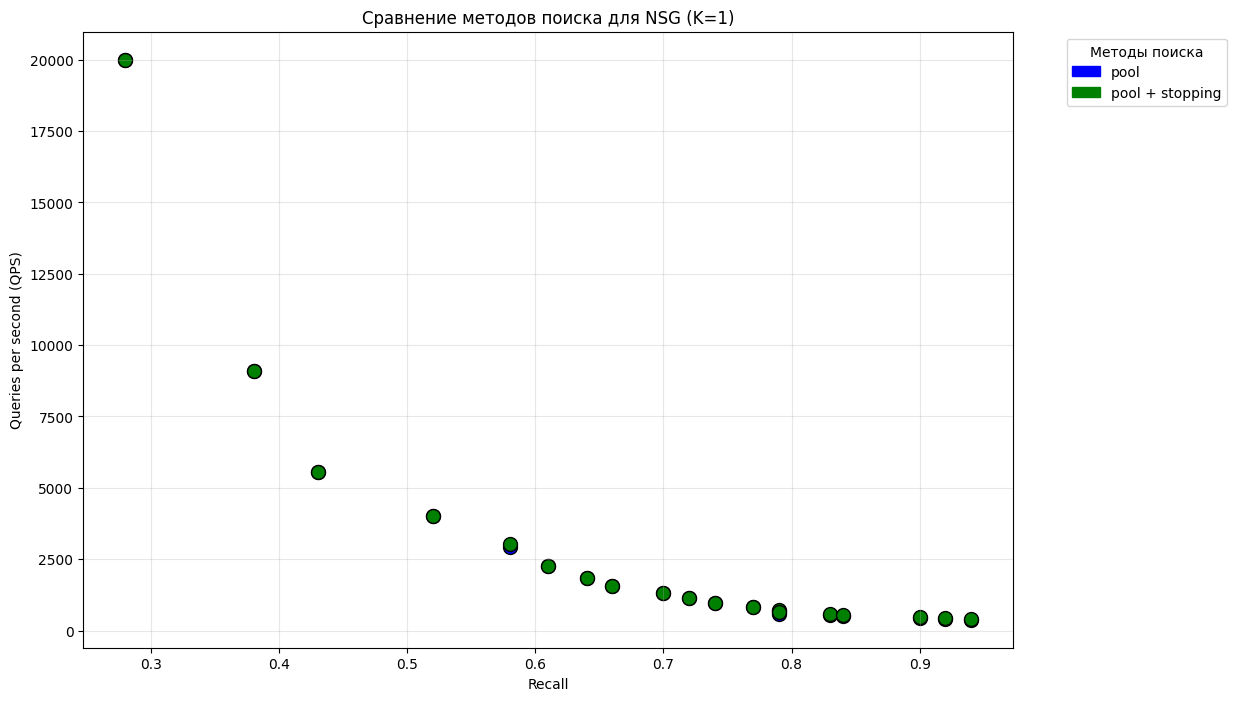

In [77]:
methods = ['pool', 'pool + stopping']
K = 1
dataset = 'nsg'
build(methods, K, dataset)

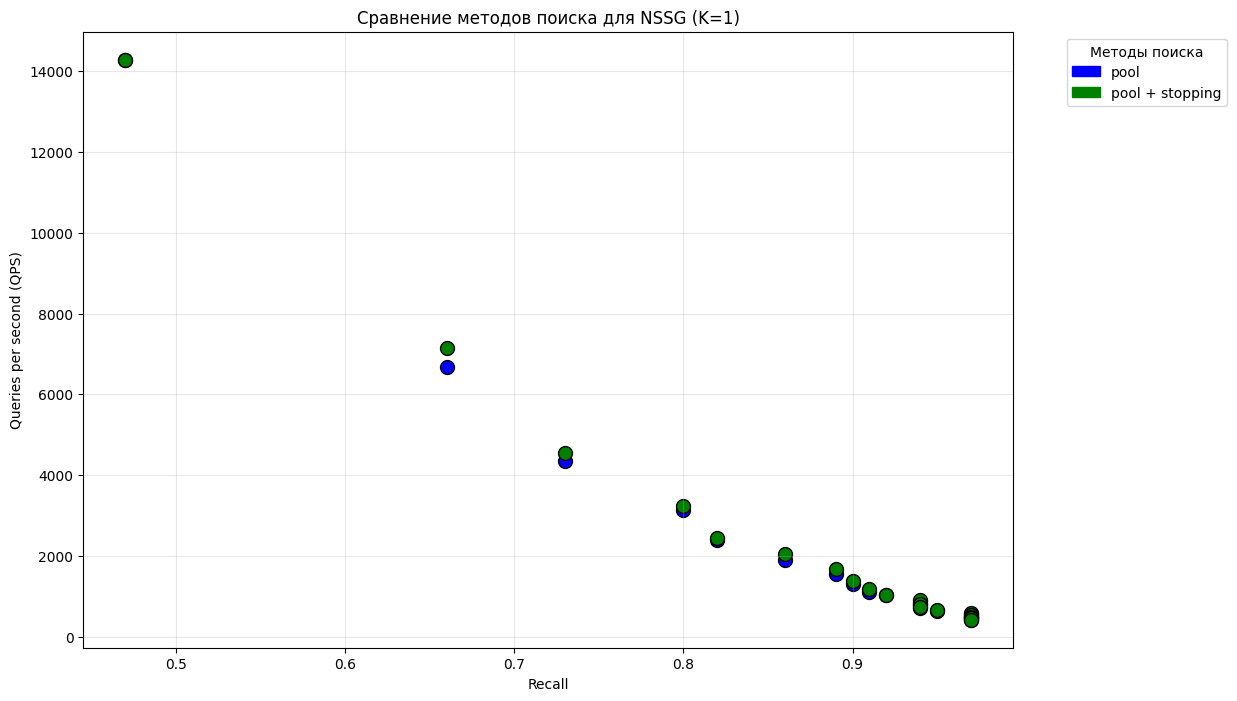

In [78]:
methods = ['pool', 'pool + stopping']
K = 1
dataset = 'nssg'
build(methods, K, dataset)

In [79]:
import matplotlib.pyplot as plt
import os
import re
import matplotlib.patches as mpatches

def parse_line(line):
        parts = line.strip().split(',')
        L = int(parts[0].split(':')[1])
        recall = float(parts[1].split(':')[1])
        qps = float(parts[2].split(':')[1])
        return L, recall, qps

def build_high_recall(methods, K, dataset):
    base_path = '../results/'
    plt.figure(figsize = (12, 8))
    plt.title(f'Сравнение методов поиска для {dataset.upper()} (K={K})')
    plt.xlabel('Recall')
    plt.ylabel('Queries per second (QPS)')
    plt.grid(True, alpha = 0.3)
    colors = ['b', 'g', 'r', 'c', 'm']
    handles = [mpatches.Patch(color = colors[i], label = methods[i]) for i in range(len(methods))]
    plt.legend(handles = handles, title = 'Методы поиска', bbox_to_anchor = (1.05, 1), loc = 'upper left')
    for method, color in zip(methods, colors):
        filename = f"{dataset} + K:{K}, {method}.txt"
        filepath = os.path.join(base_path, filename)
        with open(filepath, 'r') as f:
            lines = f.readlines()
        data = []
        for line in lines:
            try:
                L, recall, qps = parse_line(line)
                data.append((L, recall, qps))
            except:
                continue
        for L, recall, qps in data:
            if qps > 3e4 or recall < 0.9:
                continue
            plt.scatter(recall, qps, color = color, marker='o', s = 100, edgecolors = 'k')

    output_path = os.path.join('../comparision', f'comparison_high_recall_{dataset}_{methods}_K{K}.png')
    plt.savefig(output_path, dpi = 300, bbox_inches = 'tight')
    plt.show()

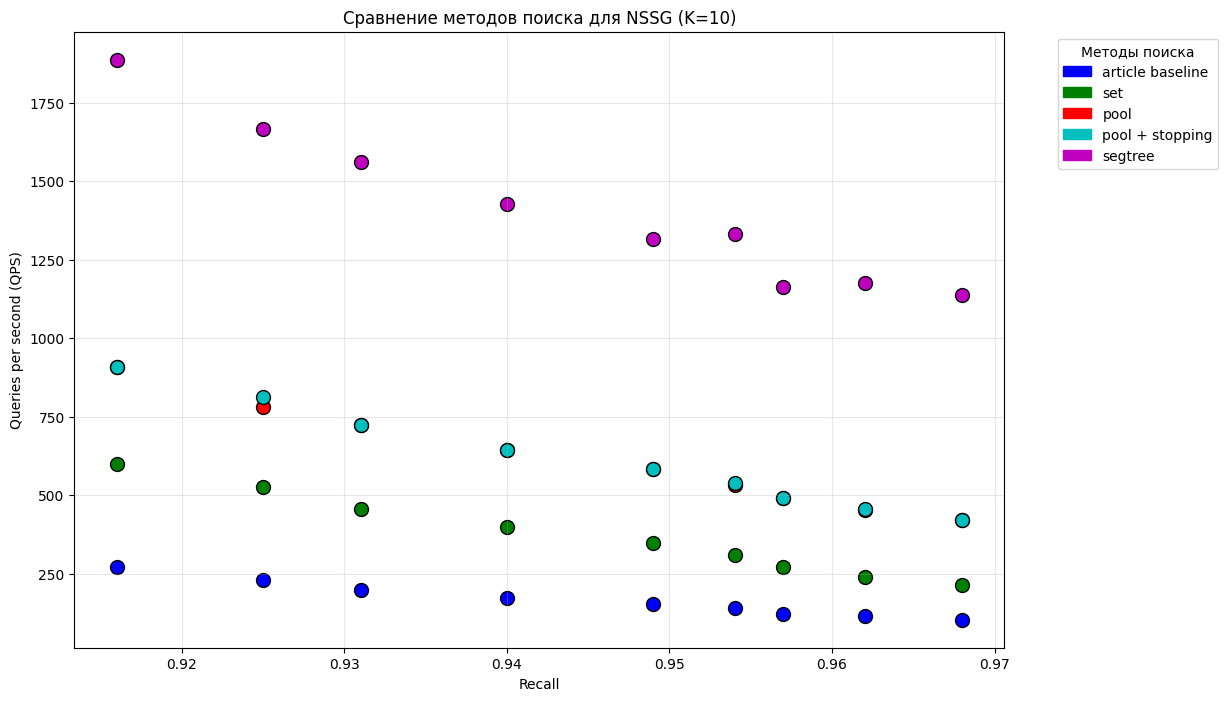

In [80]:
methods = ['article baseline', 'set', 'pool', 'pool + stopping', 'segtree']
K = 10
dataset = 'nssg'
build_high_recall(methods, K, dataset)

In [104]:
def build_datasets(methods, K):
    base_path = '../results/'
    plt.figure(figsize = (12, 8))
    plt.title(f'Сравнение способов построения индекса для (K={K})')
    plt.xlabel('Recall')
    plt.ylabel('Queries per second (QPS)')
    plt.grid(True, alpha = 0.3)
    colors = ['b', 'g', 'r']
    handles = [mpatches.Patch(color = colors[i], label = ['nssg', 'nsg', 'random'][i]) for i in range(len(['nssg', 'nsg', 'random']))]
    plt.legend(handles = handles, title = 'Способ построения индекса', bbox_to_anchor = (1.05, 1), loc = 'upper left')
    for method in methods:
        for (dataset, color) in zip(['nssg', 'nsg', 'random'], colors):
            filename = f"{dataset} + K:{K}, {method}.txt"
            filepath = os.path.join(base_path, filename)
            with open(filepath, 'r') as f:
                lines = f.readlines()
            data = []
            for line in lines:
                try:
                    L, recall, qps = parse_line(line)
                    data.append((L, recall, qps))
                except:
                    continue
            for L, recall, qps in data:
                if qps > 3e4:
                    continue
                plt.scatter(recall, qps, color = color, marker='o', s = 100, edgecolors = 'k')

    output_path = os.path.join('../comparision', f'comparison_{methods}_K{K}.png')
    plt.savefig(output_path, dpi = 300, bbox_inches = 'tight')
    plt.show()

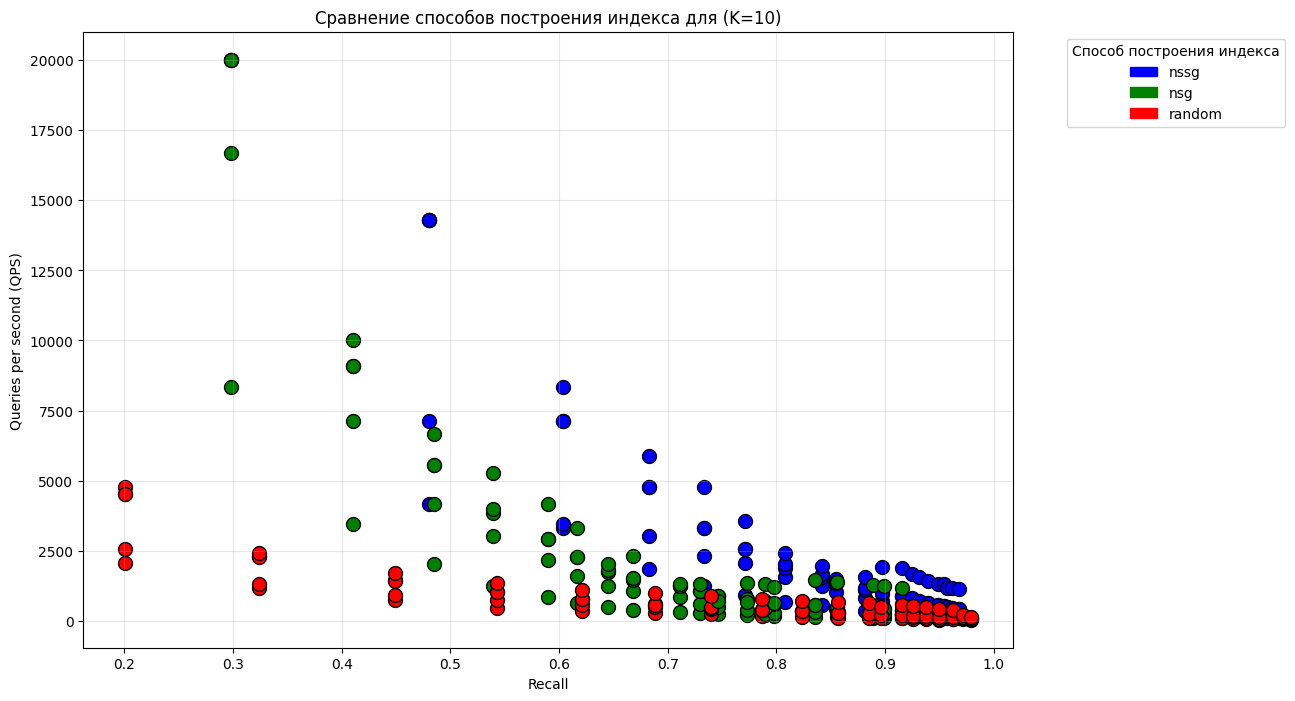

In [105]:
methods = ['article baseline', 'set', 'pool', 'pool + stopping', 'segtree']
K = 10
build_datasets(methods, K)

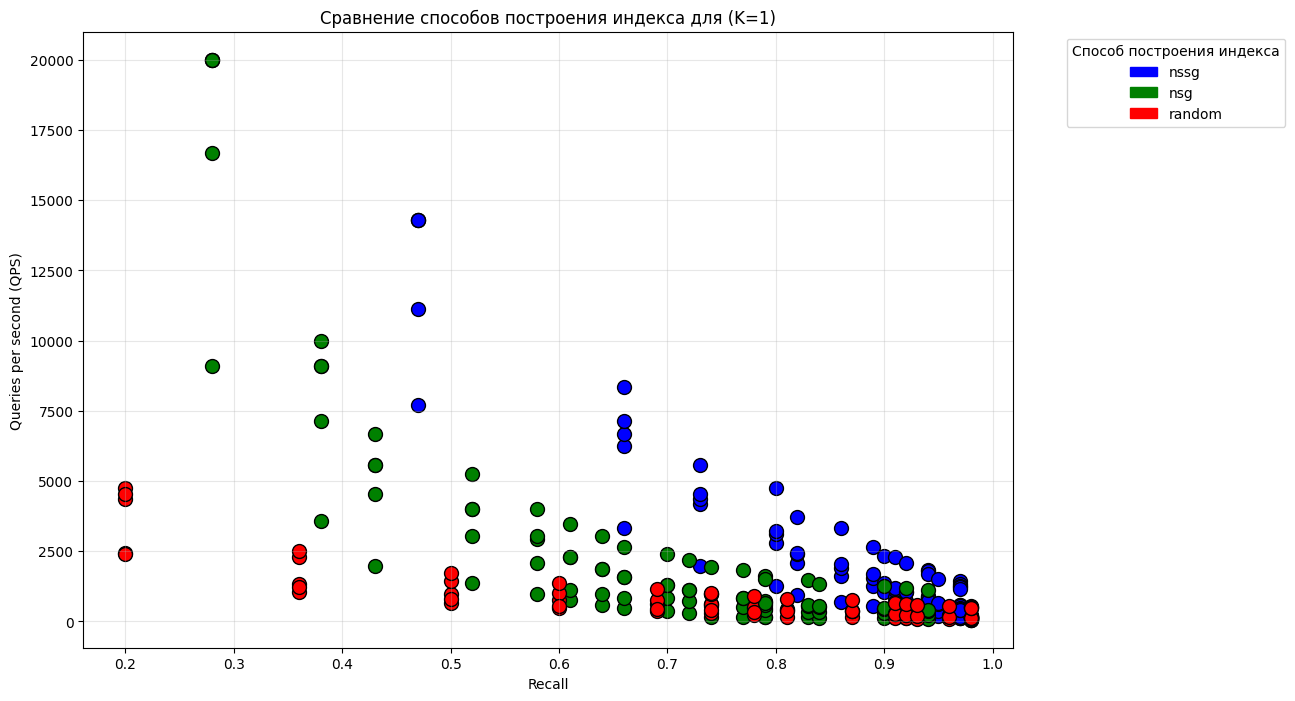

In [106]:
methods = ['article baseline', 'set', 'pool', 'pool + stopping', 'segtree']
K = 1
build_datasets(methods, K)

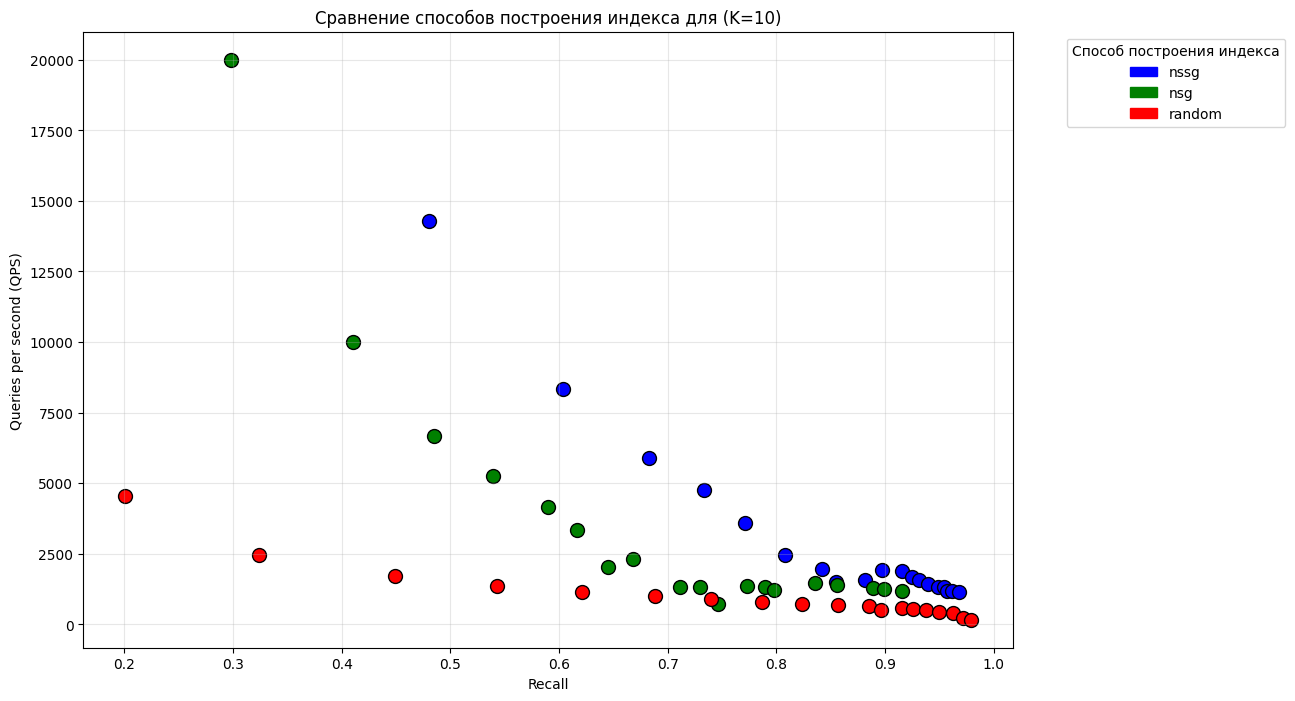

In [107]:
methods = ['segtree']
K = 10
build_datasets(methods, K)